In [1]:
# imports
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## Ex 1

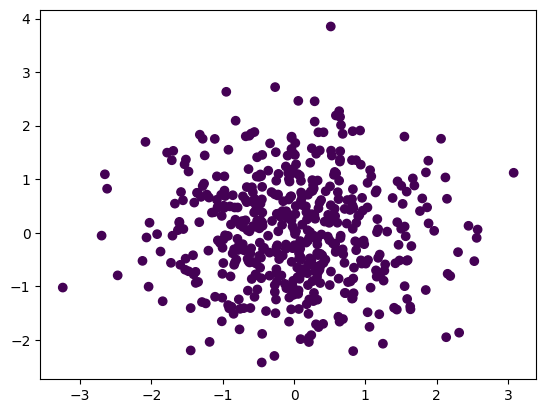

In [245]:
X1, Y1 = make_blobs(n_features=2, centers=[(0, 0)], random_state=RANDOM_STATE, n_samples=500)
plt.scatter(X1[:, 0], X1[:, 1], c=Y1)

### The function to plot the probability scores for different number of projections


In [258]:
def plot_probablity_scores(number_of_projections):
    projection_vectors = np.random.multivariate_normal(mean=np.zeros(2), cov=np.eye(2), size=number_of_projections)

    projected_values = []
    for vector in projection_vectors:
        projected_values.append(np.dot(X1, vector))

    histograms = []
    for values in projected_values:
        histograms.append(np.histogram(values, range=(min(values) - 5, max(values) + 5), bins=100))

    probabilities = [] 
    for hist in histograms:
        probabilities.append(hist[0] / sum(hist[0]))

    def get_probability_for_sample(value, projection_ind):
        index = np.digitize(value, histograms[projection_ind][1])
        if index < len(probabilities[projection_ind]):
            return probabilities[projection_ind][index]
        return 0

    def compute_probability_scores(dataset):
        projected_values = [
            np.dot(dataset, vector) for vector in projection_vectors
        ] # array of n_projections x n_test_samples

        anomaly_scores = []
        for i in range(len(projected_values[0])):
            sample_projected_values = [values[i] for values in projected_values]

            sample_anomaly_scores = [
                get_probability_for_sample(val, j) for (j, val) in enumerate(sample_projected_values)
            ]

            anomaly_scores.append(np.mean(sample_anomaly_scores))   

        return anomaly_scores

    test_dataset = np.random.uniform(low=-3, high=3, size=(500, 2))

    train_probability_scores = compute_probability_scores(X1)
    test_probability_scores = compute_probability_scores(test_dataset)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    scatter = axs[0].scatter(X1[:, 0], X1[:, 1], c=train_probability_scores)

    scatter = axs[1].scatter(test_dataset[:, 0], test_dataset[:, 1], c=test_probability_scores)
    plt.colorbar(scatter, label='Probability Score')

    # plotting code for the histograms...
    # fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    # for i, hist in enumerate(histograms):
    #     axs[i // 3, i % 3].bar(hist[1][:-1], hist[0])

### Plotting the results for different number of projections..

500 5
500 5


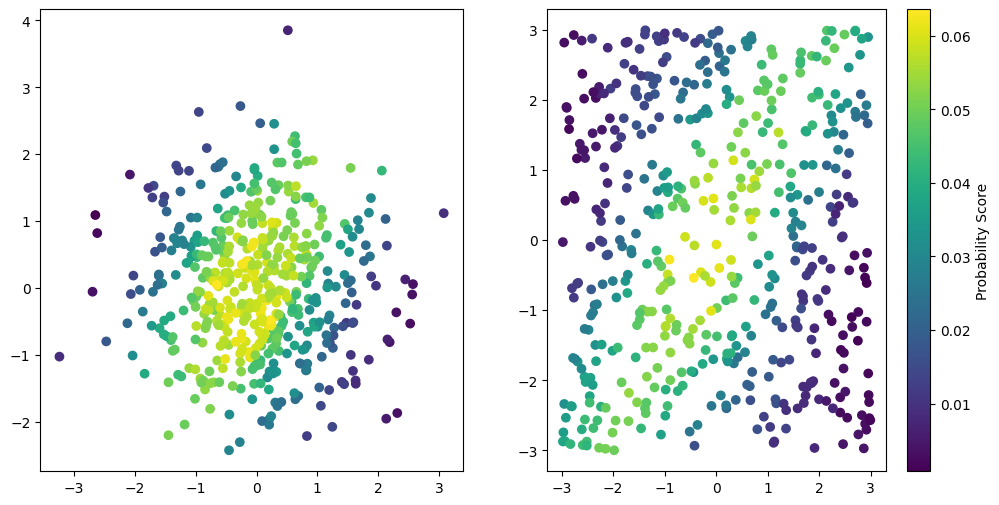

In [259]:

plot_probablity_scores(5)


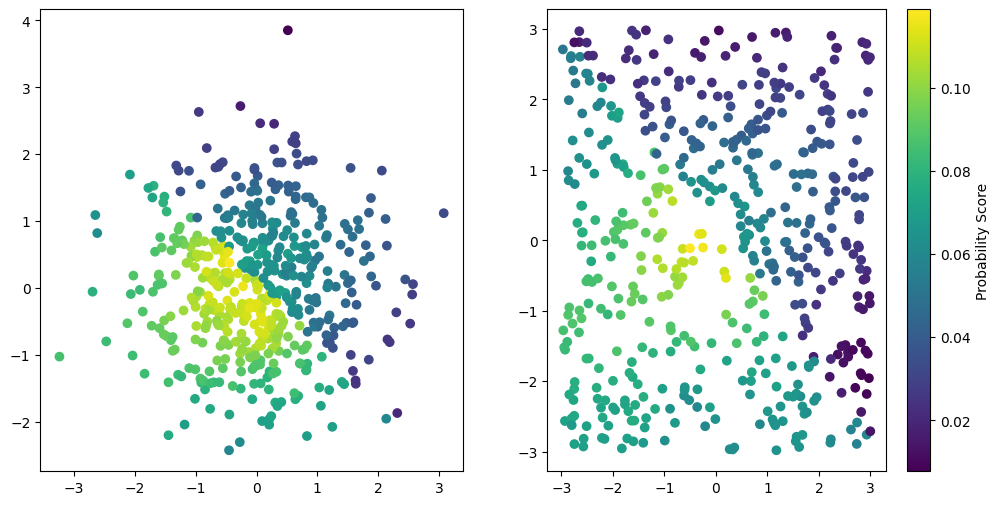

In [248]:
plot_probablity_scores(10)


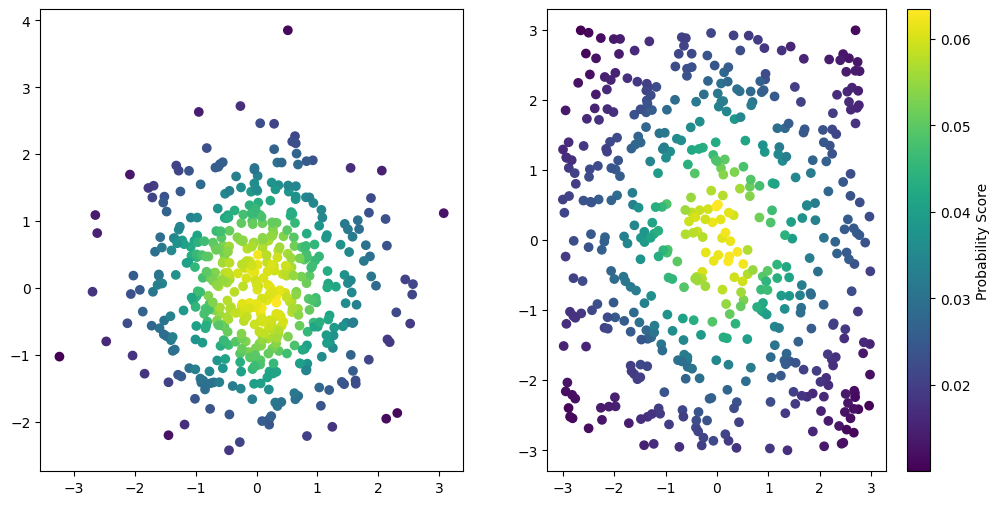

In [253]:
plot_probablity_scores(100)